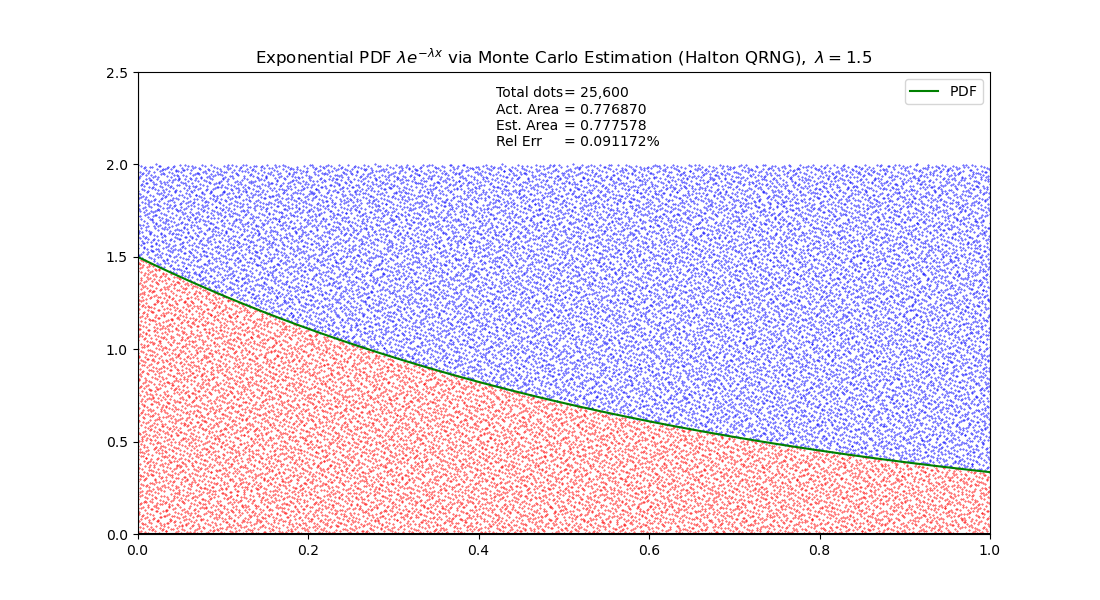

In [1]:
# mc_exp_dist.ipynb

%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np
from numba import float64, vectorize

lam = 1.5 #rate parameter of 90 minutes or 1.5 hours
rect = [1, 2] #domain of interest is 60 minutes or 1 hour, while the y I set to range from 0 to 2, even though
#there aren't any points beyond 1.5. 

@vectorize([float64(float64)], nopython=True)
def pdf(x):
    return lam * np.exp(-lam * x) #def pdf function

def cdf(x):
    return (1 - np.exp(-lam * x)) #def cdf function

@vectorize([float64(float64, float64)], nopython=True)
def halton(n, p): #generate halton numbers
    h, f = 0, 1
    while n > 0:
        f = f / p
        h += (n % p) * f
        n = int(n / p)
    return h


def plot_exp_dist(ax):
    iterations_sqrt = 160 #more than 25000 samples in total
    iterations = iterations_sqrt**2

    primes = [2, 3]

    x = halton(np.arange(iterations), primes[0]) * rect[0] #x going from 0 to 1
    y = halton(np.arange(iterations), primes[1]) * rect[1] #y going from 0 to 2

    d = pdf(x) - y #points inside the curve will have a positive d

    x_in = x[d >= 0.0]
    y_in = y[d >= 0.0]

    x_out = x[d < 0.0]
    y_out = y[d < 0.0]

    pixel_size = (72 / ax.figure.dpi) ** 2
    ax.scatter(x_in, y_in, color="red", marker=".", s=pixel_size)
    ax.scatter(x_out, y_out, color="blue", marker=".", s=pixel_size)

    act_x = np.linspace(0, 1, 1000) 
    act_y = pdf(act_x)
    ax.plot(act_x, act_y, color="green", label=r'$\mathrm{PDF}$') #plot pdf, in green

    est_area = np.count_nonzero(d >= 0.0) / iterations * np.prod(rect) #this gives MC area estimate

    act_area = cdf(1) #evaluate cdf at x = 60 mins and lambda = 90 mins

    err = (est_area - act_area) / act_area #relative error

    ax.set_title(r"$\mathrm{Exponential \ PDF} \ \lambda e^{- \lambda x}$"
                 r"$\mathrm{ \ via \ Monte \ Carlo \ Estimation \ (Halton \ QRNG)},$"
                 r"$ \ \lambda = 1.5$")
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 2.5)
    ax.axhline(0, color="black")
    ax.axvline(0, color="black")

    ax.text(0.42, 2.1, "Total dots\nAct. Area\n" "Est. Area\nRel Err", ha="left")

    ax.text(
       0.5,
       2.1,
       f"= {iterations:,}\n= {act_area:.6f}\n" f"= {est_area:.6f}\n= {err:.6%}",
        ha="left",
   )
    ax.legend()

def main():
    plt.close("all")
    fig = plt.figure(label=" ")
    fig.set_size_inches(11, 6)
    gs = fig.add_gridspec(1, 1)

    ax = fig.add_subplot(gs[0, 0])
    plot_exp_dist(ax)

    plt.show()


main()